In [2]:
import importlib
import json
import math
import os
from pathlib import Path
import sys

from arcgis.features import GeoAccessor, GeoSeriesAccessor
from dm import Country, utils, proximity
import pandas as pd

# load the "autoreload" extension so that code can change, & always reload modules so that as you change code in src, it gets loaded
%load_ext autoreload
%autoreload 2

In [3]:
dir_prj = Path.cwd().parent

dir_data = dir_prj/'data'

dir_raw = dir_data/'raw'
dir_int = dir_data/'interim'

gdb_raw = dir_raw/'raw.gdb'
gdb_int = dir_int/'interim.gdb'

In [7]:
bg_pth = gdb_int/'bg_ptrn'

In [20]:
bg_df = pd.DataFrame.spatial.from_featureclass(bg_pth).drop(columns='OBJECTID')
bg_df.spatial.set_geometry('SHAPE')

bg_df.head()

,id,electronics_internet_mp19014a_b,historical_population_totpop_cy,policy_tsegname,tapestryhouseholds_new_tsegcode,ptrn_2017_2018,ptrn_2018_2019,ptrn_2018_2019_delta,ptrn_2019_2020,ptrn_2019_2020_delta,ptrn_2020_2021,ptrn_2020_2021_delta,ptrn_2017_2018_adj,ptrn_2018_2019_adj,ptrn_2018_2019_delta_adj,ptrn_2019_2020_adj,ptrn_2019_2020_delta_adj,ptrn_2020_2021_adj,ptrn_2020_2021_delta_adj,SHAPE
0,150030002005,988.0,1503.0,Pacific Heights,2C,0.0,0.0,0.0,4.0,4.0,0.0,-4.0,0.000000,0.000000,0.000000,6.08502,6.085020,0.0,-6.08502,"{""rings"": [[[-157.72245999999998, 21.291575001..."
1,150030099022,775.0,1241.0,Pacific Heights,2C,0.0,4.0,4.0,0.0,-4.0,0.0,0.0,0.000000,6.405161,6.405161,0.00000,-6.405161,0.0,0.00000,"{""rings"": [[[-158.11244999999997, 21.577040000..."
2,150030101003,591.0,955.0,Pacific Heights,2C,0.0,4.0,4.0,0.0,-4.0,0.0,0.0,0.000000,6.463621,6.463621,0.00000,-6.463621,0.0,0.00000,"{""rings"": [[[-157.98318999999998, 21.711790001..."
3,150070401041,540.0,937.0,The Great Outdoors,6C,4.0,0.0,-4.0,0.0,0.0,0.0,0.0,6.940741,0.000000,-6.940741,0.00000,0.000000,0.0,0.00000,"{""rings"": [[[-159.55846999999997, 22.226470002..."
4,410030102003,712.0,1169.0,The Great Outdoors,6C,0.0,4.0,4.0,0.0,-4.0,0.0,0.0,0.000000,6.567416,6.567416,0.00000,-6.567416,0.0,0.00000,"{""rings"": [[[-123.43794099999997, 44.719629000..."


In [21]:
wp_df = pd.DataFrame.spatial.from_featureclass(gdb_int/'ski_areas_ba', where_clause="CONAME = 'WHITE PASS'").drop(columns='OBJECTID')
wp_df.spatial.set_geometry('SHAPE')

wp_df

,LOCNUM,CONAME,STREET,CITY,STATE,STATE_NAME,ZIP,ZIP4,NAICS,SIC,...,EMPNUM,FRNCOD,ISCODE,SQFTCODE,LOC_NAME,STATUS,SCORE,SOURCE,REC_TYPE,SHAPE
0,175369255,WHITE PASS,US HIGHWAY 12,NACHES,WA,Washington,98937,9507,72119910,701110,...,230,,,8,StreetAddress,M,100.0,INFOGROUP,0,"{""x"": -13512861.970168734, ""y"": 5883390.162908..."


In [22]:
cntry = Country('USA')

cntry

<dm.Country - USA (local)>

In [23]:
%%time
rt_df = bg_df.dm.get_nearest(wp_df, source=cntry, single_row_per_origin=False, origin_id_column='id', destination_id_column='LOCNUM', destination_count=1)

rt_df

Wall time: 4min 9s


,origin_id,destination_rank,destination_id,proximity_kilometers,proximity_minutes,proximity_side_street_left,proximity_side_street_right,SHAPE,electronics_internet_mp19014a_b,historical_population_totpop_cy,...,ptrn_2019_2020_delta,ptrn_2020_2021,ptrn_2020_2021_delta,ptrn_2017_2018_adj,ptrn_2018_2019_adj,ptrn_2018_2019_delta_adj,ptrn_2019_2020_adj,ptrn_2019_2020_delta_adj,ptrn_2020_2021_adj,ptrn_2020_2021_delta_adj
0,410030102003,1,175369255,421.542102,285.712620,1,0,"{""hasM"": true, ""paths"": [[[-123.51428636299994...",712.0,1169.0,...,-4.0,0.0,0.0,0.000000,6.567416,6.567416,0.000000,-6.567416,0.0,0.000000
1,410170004021,1,175369255,476.514911,336.443557,0,1,"{""hasM"": true, ""paths"": [[[-121.48723090099998...",929.0,1568.0,...,4.0,0.0,-4.0,0.000000,0.000000,0.000000,6.751346,6.751346,0.0,-6.751346
2,410170013002,1,175369255,437.095586,301.805099,0,1,"{""hasM"": true, ""paths"": [[[-121.32228722999997...",2903.0,4504.0,...,-4.0,0.0,0.0,0.000000,6.205994,6.205994,0.000000,-6.205994,0.0,0.000000
3,410390003001,1,175369255,425.774756,278.169677,1,0,"{""hasM"": true, ""paths"": [[[-123.02679999999998...",770.0,1149.0,...,4.0,0.0,-4.0,0.000000,0.000000,0.000000,5.968831,5.968831,0.0,-5.968831
4,410390015004,1,175369255,498.011906,326.597864,1,0,"{""hasM"": true, ""paths"": [[[-122.45510804799994...",887.0,1522.0,...,0.0,0.0,0.0,6.863585,0.000000,-6.863585,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,510131023011,1,175369255,4426.180104,2460.192875,0,1,"{""hasM"": true, ""paths"": [[[-77.10958958799995,...",607.0,902.0,...,-4.0,0.0,0.0,0.000000,5.943987,5.943987,0.000000,-5.943987,0.0,0.000000
1107,420750040001,1,175369255,4388.147139,2417.479094,0,1,"{""hasM"": true, ""paths"": [[[-76.58019740899994,...",3253.0,5668.0,...,-4.0,0.0,0.0,0.000000,6.969567,6.969567,0.000000,-6.969567,0.0,0.000000
1108,340190118002,1,175369255,4566.752370,2515.209212,0,1,"{""hasM"": true, ""paths"": [[[-74.90077497199997,...",1342.0,1797.0,...,4.0,0.0,-4.0,0.000000,0.000000,0.000000,5.356185,5.356185,0.0,-5.356185
1109,440070037003,1,175369255,4884.424369,2714.940057,0,1,"{""hasM"": true, ""paths"": [[[-71.39615494699996,...",927.0,1181.0,...,4.0,0.0,-4.0,0.000000,0.000000,0.000000,5.096009,5.096009,0.0,-5.096009


In [24]:
rt_df.drop(columns=['destination_rank', 'destination_id', 'proximity_side_street_left', 'proximity_side_street_right'], inplace=True)

In [25]:
rt_df.head()

,origin_id,proximity_kilometers,proximity_minutes,SHAPE,electronics_internet_mp19014a_b,historical_population_totpop_cy,policy_tsegname,tapestryhouseholds_new_tsegcode,ptrn_2017_2018,ptrn_2018_2019,...,ptrn_2019_2020_delta,ptrn_2020_2021,ptrn_2020_2021_delta,ptrn_2017_2018_adj,ptrn_2018_2019_adj,ptrn_2018_2019_delta_adj,ptrn_2019_2020_adj,ptrn_2019_2020_delta_adj,ptrn_2020_2021_adj,ptrn_2020_2021_delta_adj
0,410030102003,421.542102,285.712620,"{""hasM"": true, ""paths"": [[[-123.51428636299994...",712.0,1169.0,The Great Outdoors,6C,0.0,4.0,...,-4.0,0.0,0.0,0.000000,6.567416,6.567416,0.000000,-6.567416,0.0,0.000000
1,410170004021,476.514911,336.443557,"{""hasM"": true, ""paths"": [[[-121.48723090099998...",929.0,1568.0,The Great Outdoors,6C,0.0,0.0,...,4.0,0.0,-4.0,0.000000,0.000000,0.000000,6.751346,6.751346,0.0,-6.751346
2,410170013002,437.095586,301.805099,"{""hasM"": true, ""paths"": [[[-121.32228722999997...",2903.0,4504.0,Exurbanites,1E,0.0,4.0,...,-4.0,0.0,0.0,0.000000,6.205994,6.205994,0.000000,-6.205994,0.0,0.000000
3,410390003001,425.774756,278.169677,"{""hasM"": true, ""paths"": [[[-123.02679999999998...",770.0,1149.0,Exurbanites,1E,0.0,0.0,...,4.0,0.0,-4.0,0.000000,0.000000,0.000000,5.968831,5.968831,0.0,-5.968831
4,410390015004,498.011906,326.597864,"{""hasM"": true, ""paths"": [[[-122.45510804799994...",887.0,1522.0,Midlife Constants,5E,4.0,0.0,...,0.0,0.0,0.0,6.863585,0.000000,-6.863585,0.000000,0.000000,0.0,0.000000


In [26]:
%%time
rt_fc = rt_df.spatial.to_featureclass(gdb_int/'bg_ptrn_rt')
utils.add_enrich_aliases(rt_fc, cntry)

rt_fc

Wall time: 13.8 s


'D:\\projects\\safegraph-data-utilities\\data\\interim\\interim.gdb\\bg_ptrn_rt'

In [133]:
ptrn_cols = [c for c in rt_df.columns if c.startswith('ptrn')]
print(ptrn_cols)
b_df = rt_df[ptrn_cols] == 0
fltr = b_df.apply(lambda r: r.any(), axis=1)
fltr

['ptrn_2017_2018', 'ptrn_2018_2019', 'ptrn_2018_2019_delta', 'ptrn_2019_2020', 'ptrn_2019_2020_delta', 'ptrn_2020_2021', 'ptrn_2020_2021_delta', 'ptrn_2017_2018_adj', 'ptrn_2018_2019_adj', 'ptrn_2018_2019_delta_adj', 'ptrn_2019_2020_adj', 'ptrn_2019_2020_delta_adj', 'ptrn_2020_2021_adj', 'ptrn_2020_2021_delta_adj']


0       True
1       True
2       True
3       True
4       True
        ... 
1106    True
1107    True
1108    True
1109    True
1110    True
Length: 1111, dtype: bool

In [138]:
pct_75 = rt_df['proximity_minutes'].describe()['75%']

pct_75

163.67527748348616

In [154]:
rt_avg_df = rt_df[rt_df.proximity_minutes < pct_75].groupby('policy_tsegname').mean().sort_values('proximity_minutes')

rt_max_min = rt_avg_df.proximity_minutes.max()
tics = [val * 60 for val in range(1, math.ceil(rt_max_min / 60) + 1)]

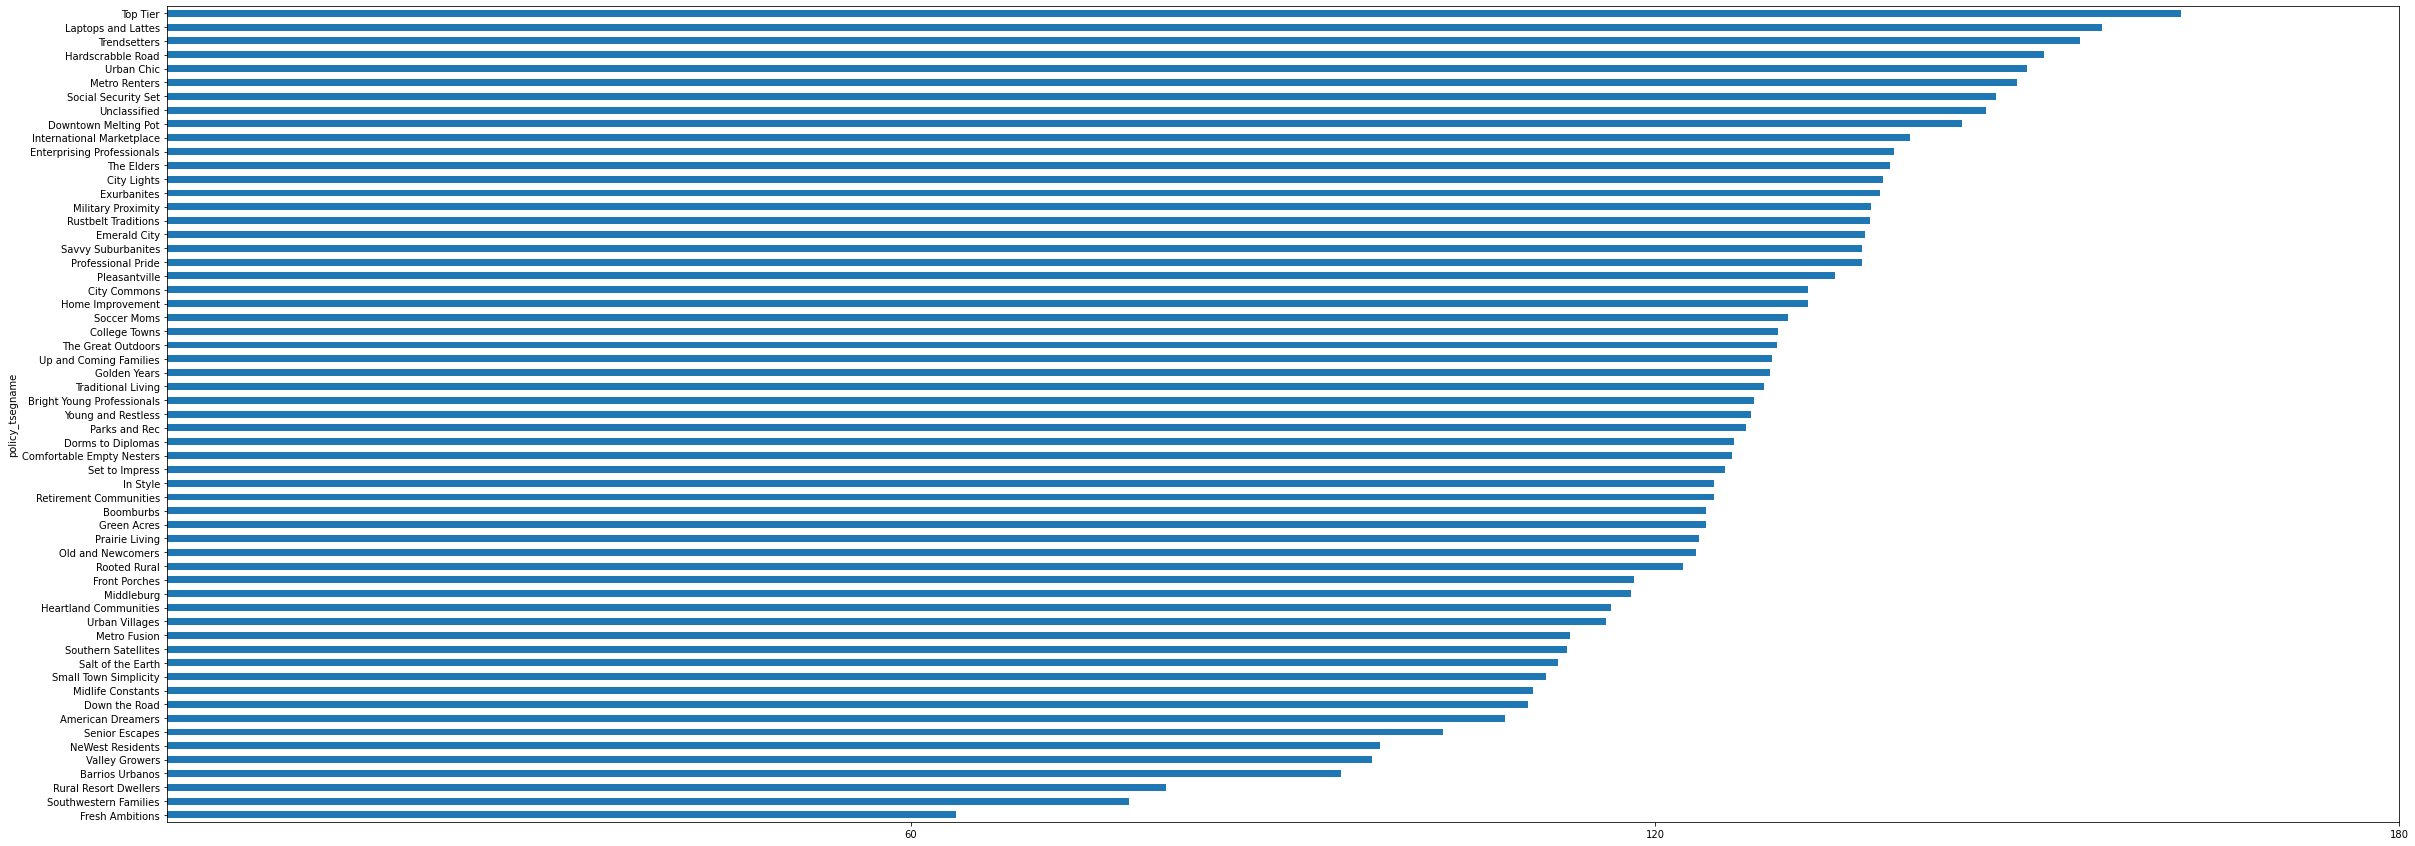

In [155]:
ax = rt_avg_df.proximity_minutes.plot(kind='barh', figsize=(40, 15))
_ = ax.set_xticks(tics)

In [99]:
from arcgis.geometry import Geometry

bg_pt_df = bg_ptrn_df.copy()

bg_pt_df.SHAPE = bg_ptrn_df.SHAPE.apply(lambda geom: Geometry({'x': geom.centroid[0], 'y': geom.centroid[1], 'spatialReference': {'wkid': 4326}}))

bg_pt_df.spatial.set_geometry('SHAPE')

bg_pt_df.spatial.validate()

True